<a href="https://colab.research.google.com/github/mikeygii/Beer_Review/blob/main/Beer_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mikey Golaski
###Danny Ryan
###Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


##Problem Statement:

For our project, we chose to analyze a data set containing over 1.5 million beer reviews. As we are both enthusiasts ourselves, we wanted to see how other people's rating of the categories affected their overall rating of the beer.

Our first and main question was what factors lead people to rate a beer higher or lower than other beers. To answer this, we utilized a decision tree and regression.

Our second question was we were curious to see if we could use DMML techniques to accurately predict certain characteristics about the beer. Our main focus of characterstics were overall score and abv.  

Those are challenging problems, as this data set contained over 1.5 million reviews, are of which are subjective. In addition, people's opinions of beer varies widely on a person by person basis, which can make finding signifigant results more challenging. Due to the size of the data set and that we did not want outlier beer reviews to overly infuence our results, much of our analsis was done using means of groups, as we see that as a fair and accurete way to represent the data.

# Grade Target
### below is our grade targets from our project proposal.

Low Target:
Simple data mining methods such as normalization and visualizations that do not reveal anything insightful about the data.

Medium Target:
2-3 methods from class learned with no new DMML techniques implemented
Some visualizations used but not the most informative or applicable to our project


High Target:
More than three DMML techniques used from class, and at least one other new method implemented to analyze the data
Visualizations are applicable to the problem question, are well constructed and easy to read, and make the overall project better and more informative.

Our goal was to achieve all the parts of the high target.


Data was downloaded from the Kaggle link below:


https://www.kaggle.com/rdoume/beerreviews

In [3]:
df = pd.read_csv('/content/beer_reviews.csv')
df = df.dropna()
print(df.shape)

(410715, 13)


The code below drops three columns that are review time, brewery id, and beer id. All three of those columns are not needed for our analysis.

In [4]:
df = df.drop(['review_time', 'brewery_id', 'beer_beerid'], axis=1)
df.shape

(410715, 10)

In [5]:
df.head()

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


The code below generates a histogram to display the spread of all six variables included in the data set

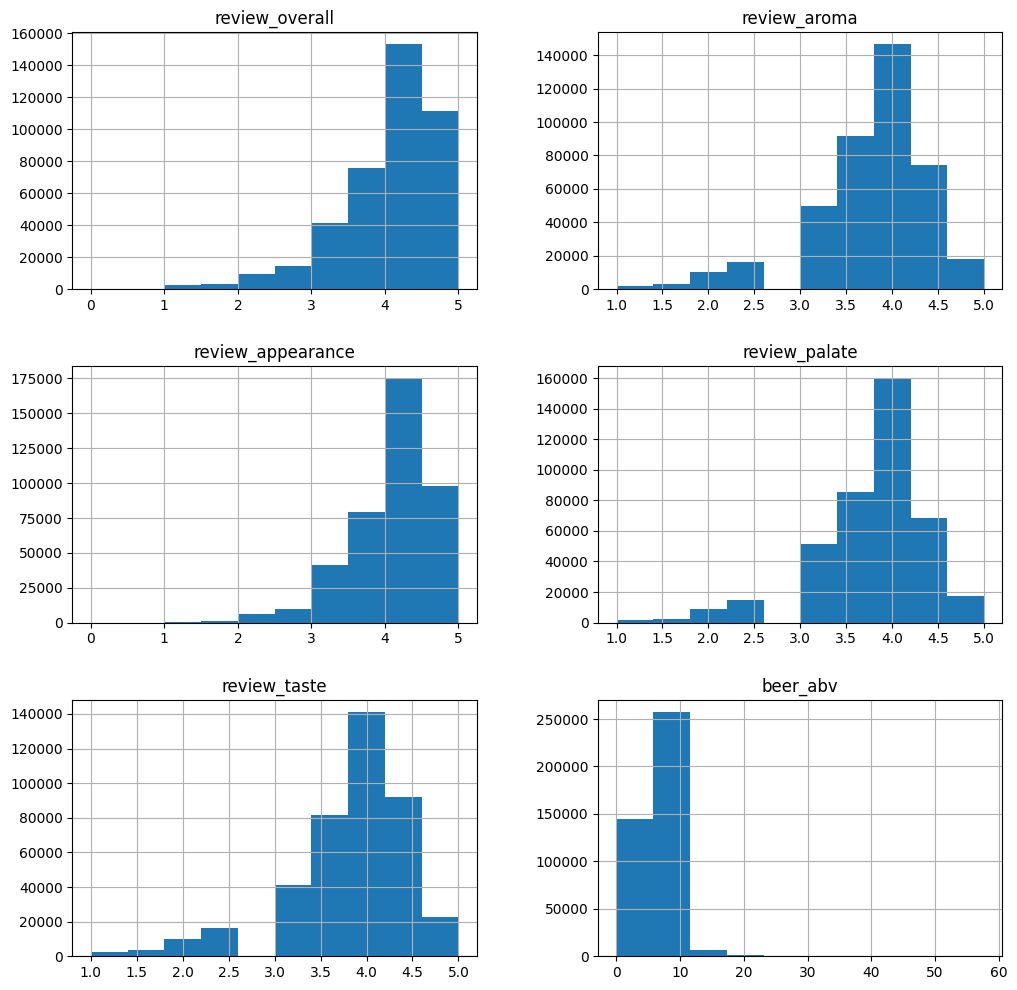

In [6]:
df.hist(figsize=(12,12))
plt.show()

###Analysis of the Histogram showing all reviews in the dataset above:
review_overall - left skewed, and most beers are rated between 4 and 5

review_aroma  - the spread of the data is normal, and centered at a rating of 4

review_appearance	- left skewed, and most beers appearences are rated between 4 and 5

review_palate	- the spread of the data is normal, and centered at a rating of 4

review_taste - 	the spread of the data is normal, and centered at a rating of 4

beer_abv	- right skewed and a large majority of the beers present in the data set have an abv below 10 percent

The code below creates a new dataframe called df_beers. It first takes all unique beer names, and then takes the average of all of the unique beer name reviews and uses that to fill in the columns. Df_beers_1000 is the top 1000 rated beers based of their average review from the data set.



In [10]:
df_beers = df.groupby("beer_name").mean(numeric_only=True).reset_index()
df_beers_1000 = df_beers.nlargest(1000, 'review_overall')

###Decision Tree

In order to create a Decision tree that splits beer style into either a category of Good or Bad we must first group all of the beer styles togethers. Afterwards we can take the mean of every category in beer style to and reset the index so our data frame is in alphabetical order based on beer style.

In [11]:
df_beerType = df.groupby('beer_style').mean(numeric_only = True).reset_index()

Next we must define our groups for beer style. If the review overall for a beer style is over 3.75 then we can say that the beer style is good. Everything else is put into the Bad group.

In [12]:
df_beerType['beer_label'] = ['good' if x >=3.75 else 'bad' for x in df_beerType['review_overall']]

Most Beer Styles were placed into the good group.

In [13]:
df_beerType['beer_label'].value_counts()

beer_label
good    65
bad     39
Name: count, dtype: int64

In [14]:
df_beerType.head()

,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_label
0,Altbier,3.812659,3.562235,3.744920,3.671041,3.695174,5.483692,good
1,American Adjunct Lager,3.164408,2.583354,2.862817,2.845288,2.832049,4.856739,bad
2,American Amber / Red Ale,3.919129,3.780578,3.911386,3.781527,3.850071,6.412414,good
3,American Amber / Red Lager,3.414160,3.036101,3.383875,3.162054,3.189531,4.843201,bad
4,American Barleywine,3.948031,4.074567,4.128643,4.059085,4.109517,10.205474,good


Below we seperated our variables into two difference vectors holding our respone and explanatory variables


In [15]:
y = df_beerType['beer_label']
X = df_beerType[['review_aroma','review_palate','review_taste', 'beer_abv']]

Below we split our data into training data and testing data

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=0)


The two blocks of code below generate the decision tree and the associated visualization

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(Xtrain, ytrain)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

The largest group size with 0 entropy was a group of size 43. The first split for that group was review_palate > 3.57. The second split for that group was review_taste > 3.814. This was interesting, as the only two splits needed both had to do with taste. This tells us that people are more worried about their beer tasting good then their beer smelling good or having a certain abv. This makes sense, as these beer reviews are for beers considered to be nicer than beer commonly asssociated with college and is cheaper, so the reviewers are more worried about the taste than the alcohol percentage. As for the aroma, it did not even make the decision tree, which tells us the ratings had a wide range of aroma's rating for both highly rated and lowly rated beers. We agree with that, as aroma is much more subjective than taste.

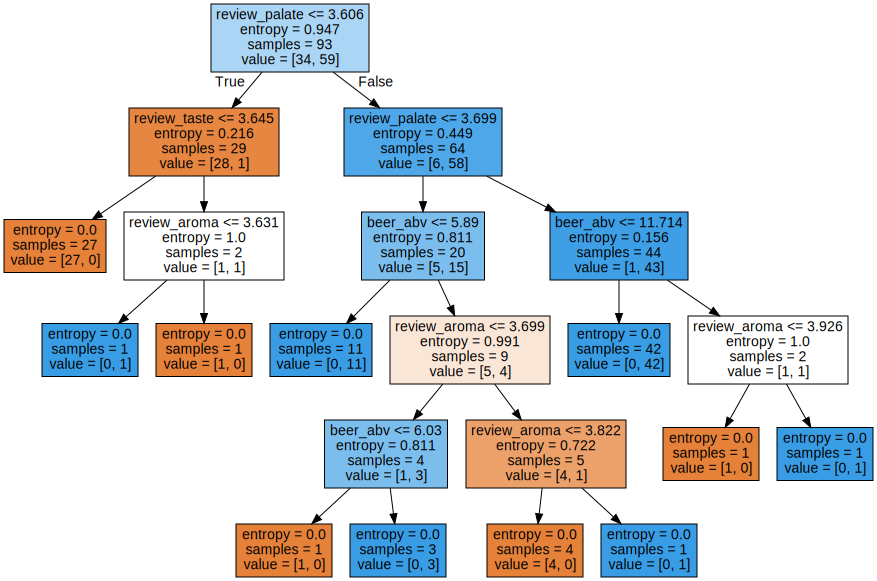

In [18]:
vis_data = export_graphviz(clf, out_file=None,
                feature_names=Xtrain.columns,
                filled=True)

graph = graphviz.Source(vis_data)
graph

The code below is for generating a ANN model to see how accuretly we can predict if a beer is labeled good (Overall rating >= 3.75) or bad (overall rating < 3.75)

In [19]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.946236559139785
Testing accuracy: 0.6363636363636364


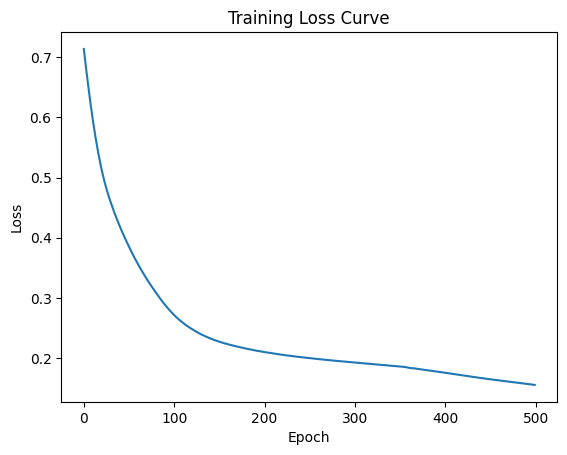

In [20]:
mlp=MLPClassifier(
        hidden_layer_sizes=(18, 18, 18),
        solver='adam',
        learning_rate_init=0.001,
        warm_start=True,
        activation="relu",
        max_iter=500,
        tol=1e-5,
        n_iter_no_change=50,
        early_stopping=False)
mlp.fit(Xtrain,ytrain)

print('Training accuracy:', mlp.score(Xtrain,ytrain))
print('Testing accuracy:', mlp.score(Xtest,ytest))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss');

Our training accurecy was 1, and our testing accurecy was 0.909. The training accurecy of 1 is concerning, as we are a little worried about overfitting for the data. However, we did have 18 layers with 18 nodes in each layer, so it is a big model. Our testing accurecy was 0.909, which makes us believe if our training data was larger, the accurecy would drop from 1 and get closer to the accurecy of the testing data.

###Regression
####We are trying to build a statistical model that effectively ranks beer reviews overall score. By taking the most influencial factors we can created a Multiple Linear Regression model that effectively predicts a beer style's overall review. This eliminates human error for rating as many people have different prefences that may lead them to rate certain beer styles higher.

First we started by creating a new data frame that grouped every beer style together. After grouping the Beer styles together we took the average for all numerical data and reset the index of our data frame so that it was in alphabetical order based on beer style.

In [22]:
df_beer_style = df.groupby("beer_style").mean(numeric_only=True).reset_index()


We are trying to run regression to see if we can predict the Overall review score for our data. Our explantory variables are review_aroma, review_appearance, review_palate, review_taste, beer_abv. Our repsonse variable will be our Overall Review.

In [23]:
df_beer_style.head()

,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,Altbier,3.812659,3.562235,3.744920,3.671041,3.695174,5.483692
1,American Adjunct Lager,3.164408,2.583354,2.862817,2.845288,2.832049,4.856739
2,American Amber / Red Ale,3.919129,3.780578,3.911386,3.781527,3.850071,6.412414
3,American Amber / Red Lager,3.414160,3.036101,3.383875,3.162054,3.189531,4.843201
4,American Barleywine,3.948031,4.074567,4.128643,4.059085,4.109517,10.205474


In [24]:
x=df_beer_style[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
y=df_beer_style['review_overall']

Next we import our linear regression model and fit it to our explanatory and repsonse variables

In [25]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

LinearRegression()

Below is a correlation matrix for our explanatory variables. This tells us how strongly related our variables are to each other. Correlation is between -1 and 1. The correlation is stronger when it is further from 0. The positive and negative correlation tells us if the variable moves in the same direction. So for positive correlation if one variable increases the other increases as well.

In [26]:
corr_metrics = x.corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_aroma,1.000000,0.952522,0.967147,0.977533,0.515453
review_appearance,0.952522,1.000000,0.960914,0.949526,0.477354
review_palate,0.967147,0.960914,1.000000,0.985638,0.510172
review_taste,0.977533,0.949526,0.985638,1.000000,0.472090
beer_abv,0.515453,0.477354,0.510172,0.472090,1.000000


Next we printed out our regression model. It is each variables slope coefficient and our y-intercept.

In [27]:
print("Review Aroma slope:       ", round(model.coef_[0],4))
print("Review Apperance slope:   ", round(model.coef_[1],4))
print("Review Palate slope:      ", round(model.coef_[2],4))
print("Review Taste slope:       ", round(model.coef_[3],4))
print("Beer ABV slope:           ", round(model.coef_[4],4))
print("Model intercept:          ", round(model.intercept_,4))

Review Aroma slope:        -0.5451
Review Apperance slope:    -0.0979
Review Palate slope:       0.5042
Review Taste slope:        1.0411
Beer ABV slope:            -0.0316
Model intercept:           0.6003


To check our model's accuracy we use the python method .score(). It returns our R^2 value for our model. R-squared is a statistical measure of how close the data points are to the fitted regression line. R^2 ranges from 0-1 with the best score being 1.

In [28]:
print('Model Score:', round(model.score(x,y),4))

Model Score: 0.9672


Ypred is our model's predictions for our Response variable.

In [29]:
ypred=model.predict(x)

Mean Absolute Error is the average difference observed in the predicted and actual values across the whole test set.

Mean Squared Error is the average of squared differences between prediction and actual observation. Because this statistic is squared it assigns more weight to the bigger errors.

Root Mean Square Error is just the square root of MSE. It gives a more accurate represenation of the error in our prediction than MSE or R^2.

RMSE penalizes large errors more so can be more better in some situations. If being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.
MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

mae = mean_absolute_error(y, ypred)
mse = mean_squared_error(y, ypred)
rmse = math.sqrt(mse)
print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}'.format(mae, mse,rmse))

MAE: 0.0427, MSE: 0.0033, RMSE: 0.0576


In [31]:
y2 = df_beer_style[['beer_style','review_overall']]
y2['ypred'] =  ypred
y2sorted = y2.sort_values(by=['review_overall'],ascending=False)
y2sorted.head()

<ipython-input-31-0d1d89170655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2['ypred'] =  ypred


,beer_style,review_overall,ypred
72,Kvass,4.145349,4.098899
86,Quadrupel (Quad),4.135246,4.157239
27,Berliner Weissbier,4.122556,4.115805
38,Dortmunder / Export Lager,4.115974,4.122621
11,American Double / Imperial Stout,4.114140,4.113498


After reviewing our Correlation Matrix we thought that our model may be overfitted because Beer ABV had a weak correlation with the other variables. We then decided to build another model without Beer ABV in order to find a better model

In [32]:
x3=df_beer_style[['review_aroma','review_appearance','review_palate','review_taste']]
y3=df_beer_style['review_overall']

In [33]:
model1 = LinearRegression(fit_intercept=True)

model1.fit(x3, y3)

LinearRegression()

In [34]:
corr_metrics1 = x3.corr()
corr_metrics1.style.background_gradient(cmap='Blues')

,review_aroma,review_appearance,review_palate,review_taste
review_aroma,1.000000,0.952522,0.967147,0.977533
review_appearance,0.952522,1.000000,0.960914,0.949526
review_palate,0.967147,0.960914,1.000000,0.985638
review_taste,0.977533,0.949526,0.985638,1.000000


In [35]:
print("Review Aroma slope:       ", round(model1.coef_[0],4))
print("Review Apperance slope:   ", round(model1.coef_[1],4))
print("Review Palate slope:      ", round(model1.coef_[2],4))
print("Review Taste slope:       ", round(model1.coef_[3],4))
print("Model intercept:          ", round(model1.intercept_,4))

Review Aroma slope:        -0.7599
Review Apperance slope:    0.0018
Review Palate slope:       0.1599
Review Taste slope:        1.4001
Model intercept:           0.7312


Unfortunately our model's R^2 value was lower than before it seems that our model was better the first time.

In [36]:
print('Model Score:', round(model1.score(x3,y3),4))

Model Score: 0.9413


In [37]:
ypred3=model1.predict(x3)

Our other Error statistics were larger than before which means that this model is probably worse than before.

In [38]:
mae3 = mean_absolute_error(y3, ypred3)
mse3 = mean_squared_error(y3, ypred3)
rmse3 = math.sqrt(mse3)
print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}'.format(mae3, mse3, rmse3))

MAE: 0.0620, MSE: 0.0059, RMSE: 0.0771


###Bins

We wanted to run a KNN classifier to see if there was a way to predict beer abv from aroma, appearence, palate, taste, and overall rating. However, as abv is a continuous variable,we first had to apply discretization to make it discrete. To do so, we used pandas .qcut to split the data into 5 bins based off of abv. Next, we turned each of the five labels into strings such that KNN could finally be used as the data was in the correct format.

In [39]:
df_beers_1000['abv_bins'] = pd.qcut(df_beers_1000['beer_abv'], q=5)

In [40]:
df_beers_1000['abv_bins'] = df_beers_1000['abv_bins'].astype(str)

In [41]:
x4 = df_beers_1000[['review_aroma', 'review_appearance','review_palate', 'review_taste', 'review_overall' ]]
y4 = df_beers_1000['abv_bins']

In [42]:
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4,y4, test_size = 0.5, random_state = 0)

In [43]:
model4 = KNeighborsClassifier(n_neighbors= 3, metric ='euclidean')
model4.fit(xtrain4, ytrain4)
ypred4 = model4.predict(xtest4)


In [44]:
accuracy_score(ytest4, ypred4)

0.266

Using a KNN model with a test size = 0.5, 3 neighbors, and euclidean distance we got an accuracy score of 0.28 (ouch).

We next used a grid search to maxamize the KNN model with the best parameters to see what is the best accurecy we could get.

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model4, param_grid, cv=5, verbose=1)


In [46]:
grid.fit(xtrain4, ytrain4)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [47]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

In [48]:
model5 = grid.best_estimator_
model5.fit(xtrain4, ytrain4)
ypred5 = model4.predict(xtest4)
print(classification_report(ytest4, ypred5))

                precision    recall  f1-score   support

(1.999, 4.807]       0.25      0.34      0.29       102
  (4.807, 5.5]       0.25      0.37      0.30       109
    (5.5, 6.8]       0.30      0.25      0.28       102
    (6.8, 8.5]       0.20      0.13      0.16        95
   (8.5, 21.0]       0.36      0.22      0.27        92

      accuracy                           0.27       500
     macro avg       0.27      0.26      0.26       500
  weighted avg       0.27      0.27      0.26       500



The best parameters were 15 neighbors, euclidean distance, and distance as a weight. However, the accuracy only increased to 0.28, which was a much smaller jump in accuracy than we were hoping for.

This tells us KNN is not an ideal method for trying to predict abv. However, we also tried regression on abv and the results were also very poor. This leads us to believe that it is very difficult to predict the abv of a beer based off a beer reviews. Our main hypothesis to why it is so difficult has to do with the spread of abv, and how many factors can effect and not effect effect a beers alcohol percentage. Many beers in our data set were rated highly for taste and overall rating, but their abv's encompassed a wide range of high and low.

Below is our code to generate an interface such that the user can enter a number and their preferred beer style and then they are returned with the n highest ranked beers of that category.

first we made a list of all the beer styles so that it could be referenced later to ensure the input is a valid beer style from our data.

In [49]:
beer_style1  = df_beer_style['beer_style'].tolist()

Next we grouped by beer name and beer style. We used the .mean() to get the mean values of every beer rating on a beer by beer basis, and had to also group by beer_style as that is a categorical column, but we needed it to be kept in the data set so that it could be referenced later

In [51]:
df_beers1 = df.groupby(["beer_name", "beer_style"]).mean(numeric_only = True).reset_index()

Next we defined and used three functions to display the requested data from the user.

The first function top_beers() asks the user to enter their desired beer style. If they enter a style not present on the list previously re-created, they will keep getting the prompt until they do so.

The second function numberAsk() asks the user how many of the top beers from their selected styles they would like to see. If they enter a negative integer, they will be re-prompted until they enter a positive number.

THe third function main() combines the first two functions and generates the output. It first calls on the return statement of the first two functions, and thenuses an n largest and a conditional statement to generate the correct number of data enteries of the requested beer style.

In [52]:
def top_beers():
  style = str(input("please enter your desired beer style: "))
  if style not in beer_style1:
    print("We are sorry our data does not contain that type of beer")
    print("Please enter a beer style present in our data")
    return top_beers()
  else:
    return style

def numberAsk():
  number = int(input("please enter how many of the top beers from your selected style you wish to view: "))
  if(number <= 0):
    print("please enter an integer greater than 0")
    return numberAsk()
  else:
    return number

def main():
  style = top_beers()
  number = numberAsk()
  beer = df_beers1[df_beers1['beer_style'] == style]
  output = beer.nlargest(number, "review_overall")
  return output

main()






please enter your desired beer style: IPA
We are sorry our data does not contain that type of beer
Please enter a beer style present in our data
please enter your desired beer style: Berliner Weissbier
please enter how many of the top beers from your selected style you wish to view: 10


,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
9356,Southampton Berliner Weisse,Berliner Weissbier,4.768293,4.353659,4.182927,4.390244,4.560976,2.0
5026,Hottenroth Berliner Weisse (Blueberries),Berliner Weissbier,4.500000,4.000000,4.000000,4.000000,4.500000,3.1
9971,Tartare,Berliner Weissbier,4.409091,4.181818,3.954545,4.363636,4.545455,4.0
3818,Freigeist Abraxas,Berliner Weissbier,4.400000,4.300000,3.900000,4.000000,4.100000,3.8
9308,Solstice D'ete,Berliner Weissbier,4.333333,4.166667,4.194444,4.138889,4.333333,5.9
8959,"Session Ale #44: ""Weisse This Beer Sour?""",Berliner Weissbier,4.321429,3.714286,3.892857,3.928571,3.785714,2.9
1079,Beerstand Berlinerweiss,Berliner Weissbier,4.294118,3.852941,3.823529,4.147059,4.176471,3.0
5025,Hottenroth Berliner Weisse,Berliner Weissbier,4.221284,3.869932,3.896959,3.989865,4.050676,3.1
1723,Boson De Higgs,Berliner Weissbier,4.187500,4.125000,4.125000,4.000000,4.062500,3.8
1160,Berlin Alexanderplatz,Berliner Weissbier,4.125000,3.750000,3.750000,3.937500,4.062500,3.2


#Analysis of Grade Target

Overall, we are happy with our work. We implemented over 2-3 methods learned from class, and each of the methods implemented was applicable to our problems and added a new layer to the project. While our visualizations were limited in quantity, we believe their usefullness makes up for the small number. We first generated a set of six histograms to lay out the data, and give the reader a general understanding of how the spread of the data looks for each numerical category. We next made a decision tree that clearly depcits the important variabls to receiving a good overall rating. Lastly, we also included two correlation matrices with colors associted with the level of correlation between variables to show the relationship between variables. While we did not implement any new DMML techniques not learned in class, we did use pythons inout function so that the reader could say their favorite beer style, and then is returned a list of the highest rated beers of that style.

Overall, we think our project falls in the middle of the mid range and high range. We utilized a variety of difference DMML methods for different analysis of our variables, as well as we created a way for the user to interact with our project based on their individual beer taste.


While our results have room for improvement, we do believe they are overall of good quality. Our KNN model to predict abv of a beer was not high quality, but as the best accuracy the grid search resulted in was 0.28, we now believe that KNN was not the best for predicting abv, as well as the fact the abv is incredibly difficult to predict. As seen in our first correltion matrix, abv is signifigantly less correlated to the other variables than the rest of the variables, and with no correlation coefficient above 0.6. This reinforces our belief that abv is challenging to predict from the other variables, as the computer has little to go off of in terms of which variables cause abv to change.

While the large data set made this problem difficult to start (our longest run time was over two hours), once we started grouping the data and using the means of the groups, the questions we posed got easier to delve into to and much more managable.

We are satisifed with our respone to what variables lead to a better rated beer. As seen on the decision tree, palate and taste are the two most impactful to having a higher rated beer, and we our personal opinions agree with those two variables being of the highest impact.

One improvment to our project would be determining a better way to predict a beers abv based on the other categories. While this does not have the most applicable real world application (that we can think of), it is still a challenging problem and we would be curious to see if someone could find a way to solve the issue and make a more accurete model than the one we created.

